In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras


In [6]:
df = pd.read_csv("E:\ML project-1045\Ethos_Dataset_Binary (1).csv", sep=";")

In [7]:
# Convert pandas dataframe to numpy array
data = df.to_numpy()

In [8]:
# Extract comments from column 0
comments = data[:, 0]

In [9]:
# Extract labels from column 1 
labels = data[:, 1]

FEATURE ENGINEERING AND EDA


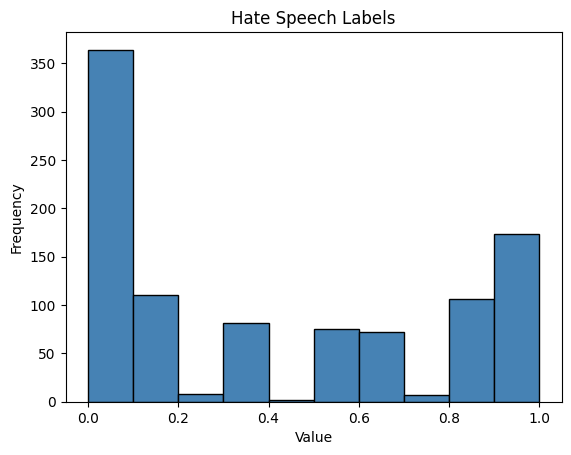

In [10]:
# Histogram of labels
plt.hist(labels, color="steelblue", edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Hate Speech Labels")
plt.show()

In [11]:
# Dichotomize labels (hate speech: 0 = no, 1 = yes) 
# Decision criterion: Hate speech if minimum 50% of reviewers rated the comment as hate speech 
labels[labels >= 0.5] = 1
labels[labels < 0.5] = 0
labels = labels.astype(int)

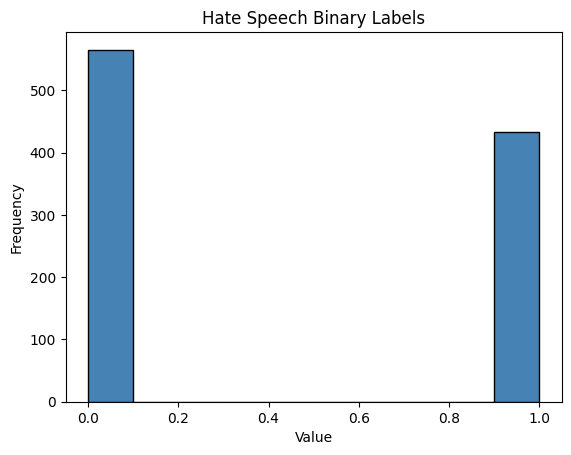

In [12]:
# Histogram of binary labels
plt.hist(labels, color="steelblue", edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Hate Speech Binary Labels")
plt.show()

In [13]:
# Label frequencies
num_hate_comments = len(labels[labels == 1])
num_no_hate_comments = len(labels[labels == 0])
percent_hate_comments = np.round(num_hate_comments/len(labels)*100,2)
percent_no_hate_comments = np.round(num_no_hate_comments/len(labels)*100,2)
print("Number of hate speech comments")
print(f"Hate speech: {num_hate_comments} comments ({percent_hate_comments}%)")
print(f"No Hate Speech: {num_no_hate_comments} comments ({percent_no_hate_comments}%)")
print("="*20)

Number of hate speech comments
Hate speech: 433 comments (43.39%)
No Hate Speech: 565 comments (56.61%)


In [14]:
# Comment length
comment_length = [len(comment) for comment in comments]

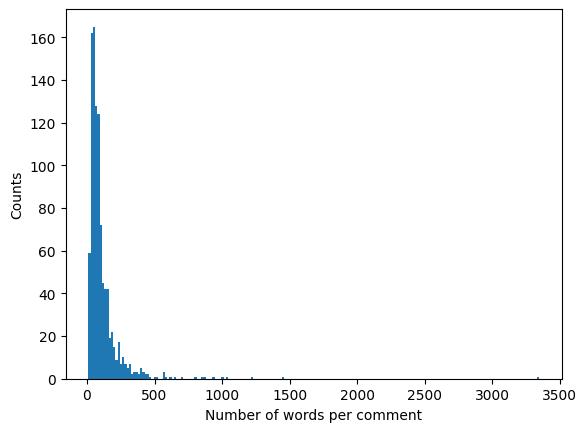

In [15]:
# Histogram of comment length
plt.hist(comment_length, bins=200)
plt.xlabel("Number of words per comment")
plt.ylabel("Counts")
plt.show()

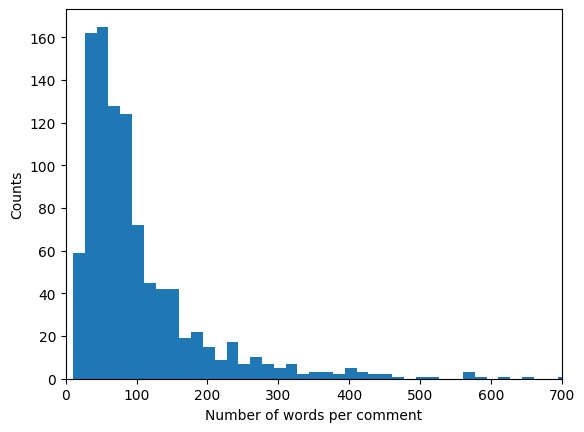

In [16]:
# Histogram of comment length from 0 to 700 words
plt.hist(comment_length, bins=200)
plt.xlabel("Number of words per comment")
plt.ylabel("Counts")
plt.xlim(0, 700)
plt.show()

In [17]:
# Mean, Std, Min, Max
print("Comment Length")
print(f"Mean: {np.round(np.array(comment_length).mean())} words")
print(f"Std: {np.round(np.array(comment_length).std())} words")
print(f"Min: {np.round(np.array(comment_length).min())} words")
print(f"Max: {np.round(np.array(comment_length).max())} words")
print("="*20)

Comment Length
Mean: 112.0 words
Std: 160.0 words
Min: 10 words
Max: 3347 words


In [18]:
# Display first 10 comments
print("Here are 10 example comments.")
for i in range(10):
    print(f"Comment {i+1}: {comments[i]}")
print("="*20) 

Here are 10 example comments.
Comment 1: You should know women's sports are a joke
Comment 2: You look like Sloth with deeper Down’s syndrome
Comment 3: You look like Russian and speak like Indian. Both are disgusting go kill yourself
Comment 4: Women deserve to be abused, I guess.
Comment 5: Women are made for making babies and cooking dinner and nothing else!!!
Comment 6: why haven't you faggots taken the bi-pill yet
Comment 7: Why don’t you go beck your god to murder you? Christianity is a joke
Comment 8: why does that african american monkey hold gun like that?
Comment 9: Why does Bulgaria exist as a country? It's one of those homosexual ones.
Comment 10: Why do negroes tear down their own neighborhoods when a black thug gets killed by law enforcement? Must be because of low IQ.


In [19]:
# Split dataset into training and test data 
comments_train, comments_test, labels_train, labels_test = train_test_split(
    comments, labels, test_size=0.3, random_state=42)

In [20]:
# Initialize instance for early stopping (used in all models)
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    mode="max",
    patience=20,
    restore_best_weights=True)

In [21]:
# Specify dropout rate (used in all models) 
dropout_rate = 0.5

SIMPLE RNN - DEEP Learning Model


In [22]:
# Initialize tokenizer 
num_words = 5000  # maximum number of unique words in the dictionary of the tokenizer
tokenizer = keras.preprocessing.text.Tokenizer(
    num_words=num_words,
    filters='"!#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=" ", char_level=False, oov_token=None)

In [23]:
# Fit tokenizer to training data  
tokenizer.fit_on_texts(comments_train)

In [24]:
# Save dictionary
word_index = tokenizer.word_index

In [25]:
# Display first 100 words of the dictionary
count = 0
for key, value in word_index.items():
    print(f"{key}: {value}")
    count += 1
    if count == 100:
        break
    

the: 1
and: 2
to: 3
i: 4
a: 5
of: 6
you: 7
is: 8
are: 9
in: 10
they: 11
that: 12
people: 13
this: 14
have: 15
for: 16
it: 17
be: 18
not: 19
all: 20
your: 21
with: 22
like: 23
them: 24
so: 25
we: 26
if: 27
or: 28
but: 29
just: 30
on: 31
my: 32
their: 33
 : 34
was: 35
what: 36
get: 37
will: 38
can: 39
fucking: 40
as: 41
me: 42
white: 43
these: 44
who: 45
an: 46
out: 47
there: 48
about: 49
because: 50
do: 51
he: 52
would: 53
how: 54
at: 55
from: 56
women: 57
when: 58
black: 59
fuck: 60
know: 61
one: 62
up: 63
it's: 64
her: 65
should: 66
no: 67
don't: 68
islam: 69
want: 70
only: 71
muslims: 72
our: 73
men: 74
being: 75
love: 76
him: 77
why: 78
by: 79
back: 80
think: 81
make: 82
kill: 83
shit: 84
she: 85
man: 86
world: 87
take: 88
god: 89
look: 90
more: 91
go: 92
hate: 93
other: 94
now: 95
most: 96
woman: 97
his: 98
religion: 99
time: 100


In [26]:
# Apply tokenizer to training and test data 
sequences_train = tokenizer.texts_to_sequences(comments_train)
sequences_test = tokenizer.texts_to_sequences(comments_test)

In [27]:
# Display first 5 sequences
print(sequences_train[:5])

[[27, 11, 9, 25, 133, 23, 312, 78, 275, 11, 377, 24, 23, 312, 2, 787, 469, 1304], [1305, 6, 378], [30, 5, 245, 579, 31, 1, 788, 2, 7, 204, 18, 5, 1306, 79, 246, 2, 46, 379, 1307, 55, 127, 789, 790, 55, 580], [470, 791, 47, 142, 12, 1308, 380, 56, 1309, 25, 276], [52, 471, 18, 10, 5, 581, 29, 472, 19, 55, 20, 169, 381, 792, 1, 1310, 313]]


In [28]:
# Apply sequence padding to obtain consistent sequence length 
max_length = 15
padded_sequences_train = keras.preprocessing.sequence.pad_sequences(
    sequences_train, 
    maxlen=max_length, 
    truncating="post", 
    padding="post"
    )
padded_sequences_test = keras.preprocessing.sequence.pad_sequences(
    sequences_test, 
    maxlen=max_length, 
    truncating="post", 
    padding="post"
    )

In [29]:
# Display first 5 padded sequences
print(padded_sequences_train[:5])

[[  27   11    9   25  133   23  312   78  275   11  377   24   23  312
     2]
 [1305    6  378    0    0    0    0    0    0    0    0    0    0    0
     0]
 [  30    5  245  579   31    1  788    2    7  204   18    5 1306   79
   246]
 [ 470  791   47  142   12 1308  380   56 1309   25  276    0    0    0
     0]
 [  52  471   18   10    5  581   29  472   19   55   20  169  381  792
     1]]


In [30]:
# Specify the number of dimensions of the word vectors in the embedding layer
word_vector_dim = 50

In [31]:
# Specify model
model1 = keras.models.Sequential()
model1.add(keras.layers.Embedding(num_words+1,  # number of words in tokenizer +1 for the "0" used for padding 
                                  word_vector_dim,
                                  input_length=max_length, 
                                  mask_zero=True))
model1.add(keras.layers.SimpleRNN(128, 
                                  return_sequences=True,
                                  dropout=dropout_rate,
                                  recurrent_dropout=dropout_rate))
model1.add(keras.layers.SimpleRNN(128, 
                                  dropout=dropout_rate, 
                                  recurrent_dropout=dropout_rate))
model1.add(keras.layers.Dense(64, activation="relu"))
model1.add(keras.layers.Dense(1, activation="sigmoid"))

c:\Users\marcu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [32]:
# Summarize model 
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Compile model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, 
               loss="binary_crossentropy",
               metrics=["accuracy"])

In [34]:
# Fit model
model1_history = model1.fit(padded_sequences_train, labels_train,
                            epochs=100, batch_size=8,
                            validation_data=(padded_sequences_test, labels_test),
                            callbacks=early_stopping)

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4417 - loss: 0.8116 - val_accuracy: 0.5500 - val_loss: 0.7002
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5192 - loss: 0.7028 - val_accuracy: 0.5467 - val_loss: 0.6960
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5384 - loss: 0.7086 - val_accuracy: 0.5500 - val_loss: 0.7019
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5647 - loss: 0.6987 - val_accuracy: 0.5567 - val_loss: 0.6897
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5280 - loss: 0.7048 - val_accuracy: 0.5500 - val_loss: 0.6936
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5230 - loss: 0.7054 - val_accuracy: 0.5500 - val_loss: 0.6976
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5699 - loss: 0.6928 - val_accuracy: 0.5500 - val_loss: 0.7034
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5414 - loss: 0.6876 - val_accuracy: 0.5500 - 

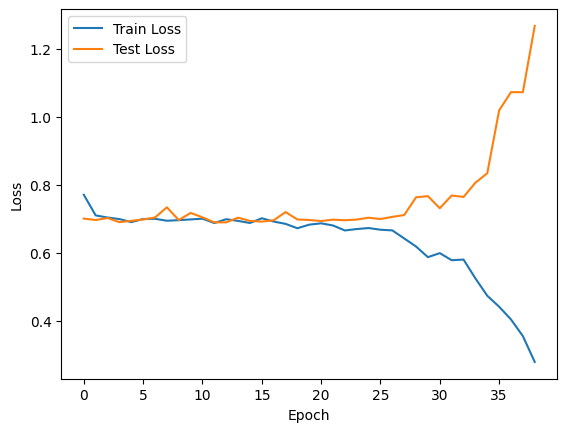

In [36]:
# Learning curve: Loss
plt.plot(model1_history.history["loss"], label="Train Loss")
plt.plot(model1_history.history["val_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

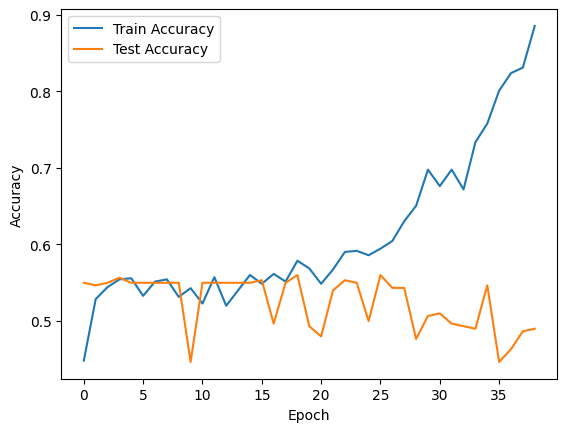

In [37]:
# Learning curve: Accuracy
plt.plot(model1_history.history["accuracy"], label="Train Accuracy")
plt.plot(model1_history.history["val_accuracy"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [38]:
# Evaluate model: Accuracy for training and test data
train_score_model1 = model1.evaluate(padded_sequences_train, labels_train)
test_score_model1 = model1.evaluate(padded_sequences_test, labels_test)
print("Accuracy Train data: ", train_score_model1[1])
print("Accuracy Test data: ", test_score_model1[1])

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5596 - loss: 0.6653
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6031 - loss: 0.6809 
Accuracy Train data:  0.5759312510490417
Accuracy Test data:  0.5600000023841858


In [39]:
# Predicted labels for test data 
labels_pred_prob_model1 = model1.predict(padded_sequences_test)
labels_pred_model1 = labels_pred_prob_model1.copy()
labels_pred_model1[labels_pred_model1 >= 0.5] = 1
labels_pred_model1[labels_pred_model1 < 0.5] = 0

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step


In [40]:
# Evaluate model: Classification report for test data
print("Classification Report: Model 1 (SimpleRNN)")
print(classification_report(labels_test, labels_pred_model1))

Classification Report: Model 1 (SimpleRNN)
              precision    recall  f1-score   support

           0       0.56      1.00      0.71       165
           1       1.00      0.02      0.04       135

    accuracy                           0.56       300
   macro avg       0.78      0.51      0.38       300
weighted avg       0.76      0.56      0.41       300



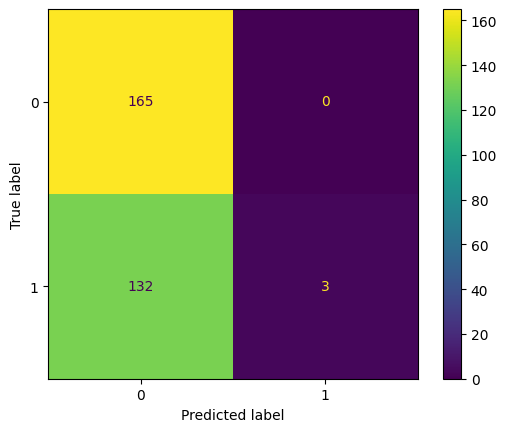

In [41]:
# Evaluate model: Confusion matrix for test data
cm = confusion_matrix(labels_test, labels_pred_model1)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

In [42]:
# Illustrative examples: True vs. predicted labels for clear and obvious hate speech 
for i in [236, 207, 15, 29, 183]:
    print(f"Comment: {comments_test[i]}")
    print(f"True label: {labels_test[i]}")
    print(f"Predicted label: {int(labels_pred_model1[i][0])}")
    print("===")

Comment: Women deserve to be abused, I guess.
True label: 1
Predicted label: 0
===
Comment: Christians are all demonic
True label: 1
Predicted label: 0
===
Comment: Muslims want war! So take it to them first
True label: 1
Predicted label: 0
===
Comment: Fat lesbians
True label: 1
Predicted label: 0
===
Comment: What imaginary gender are you?
True label: 1
Predicted label: 0
===


LSTM - SECOND DEEP LEARNING MODEL 


In [43]:
# Initialize tokenizer 
num_words = 5000  # maximum number of unique words in the dictionary of the tokenizer
tokenizer = keras.preprocessing.text.Tokenizer(
    num_words=num_words,
    filters='"!#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=" ", char_level=False, oov_token=None)

In [44]:
# Fit tokenizer to training data  
tokenizer.fit_on_texts(comments_train)

In [45]:
# Apply tokenizer to training and test data 
sequences_train = tokenizer.texts_to_sequences(comments_train)
sequences_test = tokenizer.texts_to_sequences(comments_test) 

In [46]:
# Apply sequence padding to obtain consistent sequence length 
max_length = 150
padded_sequences_train = keras.preprocessing.sequence.pad_sequences(
    sequences_train, 
    maxlen=max_length, 
    truncating="post", 
    padding="post"
    )
padded_sequences_test = keras.preprocessing.sequence.pad_sequences(
    sequences_test, 
    maxlen=max_length, 
    truncating="post", 
    padding="post"
    )

In [47]:
# Specify the number of dimensions of the word vectors in the embedding layer
word_vector_dim = 50

In [48]:
# Specify model
model2 = keras.models.Sequential()
model2.add(keras.layers.Embedding(num_words+1,  # number of words in tokenizer +1 for the "0" used for padding 
                                  word_vector_dim,
                                  input_length=max_length, 
                                  mask_zero=True))
model2.add(keras.layers.LSTM(128, 
                             return_sequences=True,
                             dropout=dropout_rate, 
                             recurrent_dropout=dropout_rate))
model2.add(keras.layers.LSTM(128, 
                             dropout=dropout_rate, 
                             recurrent_dropout=dropout_rate))
model2.add(keras.layers.Dense(64, activation="relu"))
model2.add(keras.layers.Dense(1, activation="sigmoid"))

c:\Users\marcu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [49]:
# Summarize model
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [50]:
# Compile model
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, 
               loss="binary_crossentropy",
               metrics=["accuracy"])

In [51]:
# Fit model
model2_history = model2.fit(padded_sequences_train, labels_train,
                            epochs=100, batch_size=32,
                            validation_data=(padded_sequences_test, labels_test),
                            callbacks=early_stopping)


Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 10s 262ms/step - accuracy: 0.5457 - loss: 0.6902 - val_accuracy: 0.5500 - val_loss: 0.6873
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 291ms/step - accuracy: 0.5935 - loss: 0.6787 - val_accuracy: 0.5500 - val_loss: 0.6811
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.6102 - loss: 0.6496 - val_accuracy: 0.6633 - val_loss: 0.6325
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - accuracy: 0.8127 - loss: 0.5183 - val_accuracy: 0.6900 - val_loss: 0.6409
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 229ms/step - accuracy: 0.8826 - loss: 0.3485 - val_accuracy: 0.6667 - val_loss: 0.6938
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - accuracy: 0.9460 - loss: 0.1853 - val_accuracy: 0.6700 - val_loss: 0.8651
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 226ms/step - accuracy: 0.9514 - loss: 0.1533 - val_accuracy: 0.6733 - val_loss: 1.0411
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 0.9657 - loss: 0.0832 - val_acc

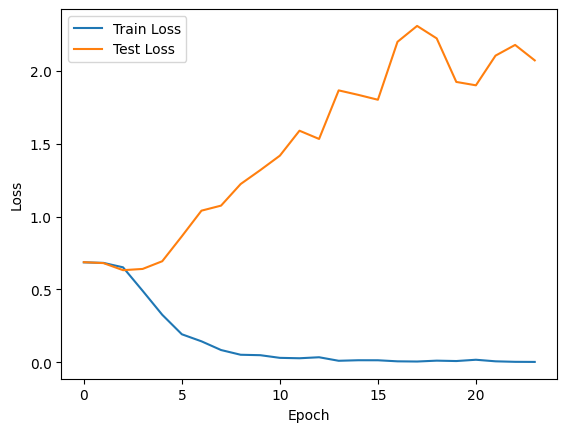

In [52]:
# Learning curve: Loss
plt.plot(model2_history.history["loss"], label="Train Loss")
plt.plot(model2_history.history["val_loss"], label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

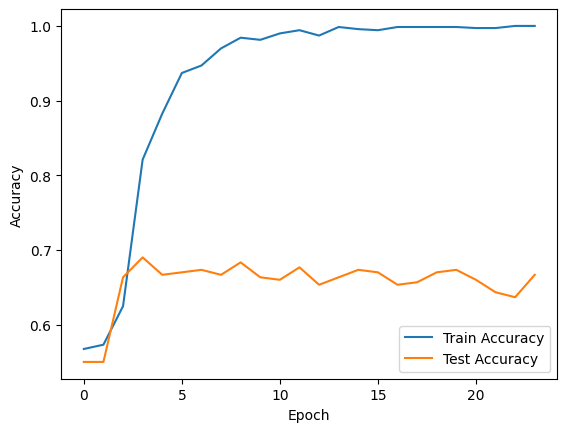

In [53]:
# Learning curve: Accuracy
plt.plot(model2_history.history["accuracy"], label="Train Accuracy")
plt.plot(model2_history.history["val_accuracy"], label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [54]:
# Evaluate model: Accuracy for training and test data
train_score_model2 = model2.evaluate(padded_sequences_train, labels_train)
test_score_model2 = model2.evaluate(padded_sequences_test, labels_test)
print("Accuracy Train data: ", train_score_model2[1])
print("Accuracy Test data: ", test_score_model2[1])

22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - accuracy: 0.9074 - loss: 0.3155
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.7028 - loss: 0.6101
Accuracy Train data:  0.9054441452026367
Accuracy Test data:  0.6899999976158142


In [55]:
# Predicted labels for test data 
labels_pred_prob_model2 = model2.predict(padded_sequences_test)
labels_pred_model2 = labels_pred_prob_model2.copy()
labels_pred_model2[labels_pred_model2 >= 0.5] = 1
labels_pred_model2[labels_pred_model2 < 0.5] = 0

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 133ms/step


In [56]:
# Evaluate model: Classification report for test data
print("Classification Report: Model 2 (LSTM)")
print(classification_report(labels_test, labels_pred_model2))

Classification Report: Model 2 (LSTM)
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       165
           1       0.70      0.54      0.61       135

    accuracy                           0.69       300
   macro avg       0.69      0.68      0.68       300
weighted avg       0.69      0.69      0.68       300



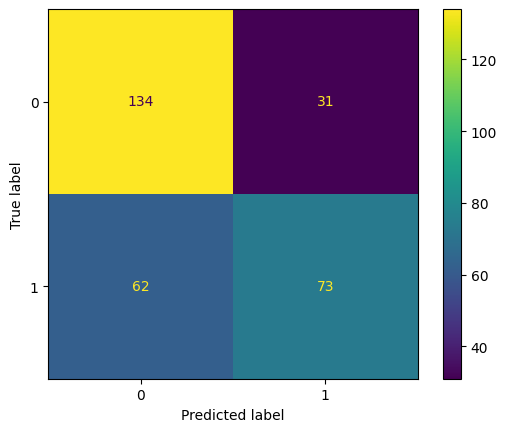

In [57]:
# Evaluate model: Confusion matrix for test data
cm = confusion_matrix(labels_test, labels_pred_model2)
cm_disp = ConfusionMatrixDisplay(cm)
cm_disp.plot()

In [58]:
# Illustrative examples: True vs. predicted labels for clear and obvious hate speech 
for i in [236, 207, 15, 29, 183]:
    print(f"Comment: {comments_test[i]}")
    print(f"True label: {labels_test[i]}")
    print(f"Predicted label: {int(labels_pred_model2[i][0])}")
    print("===")

Comment: Women deserve to be abused, I guess.
True label: 1
Predicted label: 0
===
Comment: Christians are all demonic
True label: 1
Predicted label: 1
===
Comment: Muslims want war! So take it to them first
True label: 1
Predicted label: 0
===
Comment: Fat lesbians
True label: 1
Predicted label: 1
===
Comment: What imaginary gender are you?
True label: 1
Predicted label: 0
===


BERT TRANSFORMER MODEL